# A. Scraping

In [12]:
# https://www.youtube.com/watch?v=f0sPXqlw464
# https://www.youtube.com/watch?v=6tKZcF9mckQ
# https://www.youtube.com/watch?v=rQRikWceaB8
# https://www.youtube.com/watch?v=K_C6Kbv4AmY
# https://www.youtube.com/watch?v=TZPXnuDHpeU


In [13]:
import pandas as pd
import numpy as np
import googleapiclient.discovery

In [14]:
# API Key
API_KEY = 'INSERT_YOUR_OWN_KEY'
youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=API_KEY)

# Function to get comments from a video
def get_comments(video_id):
    comments_data = []
    request = youtube.commentThreads().list(
        part="snippet",
        videoId=video_id,
        maxResults=100
    )
    response = request.execute()

    while request:
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            author = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
            like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
            title_request = youtube.videos().list(
                part="snippet",
                id=video_id
            )
            title_response = title_request.execute()
            title = title_response['items'][0]['snippet']['title']

            comments_data.append({
                "title": title,
                "author": author,
                "like_count": like_count,
                "comment": comment
            })

        # Check for the next page of comments
        if 'nextPageToken' in response:
            request = youtube.commentThreads().list(
                part="snippet",
                videoId=video_id,
                pageToken=response['nextPageToken'],
                maxResults=100
            )
            response = request.execute()
        else:
            break
    return comments_data

# List of video IDs
video_ids = ["f0sPXqlw464", "6tKZcF9mckQ", "rQRikWceaB8", "K_C6Kbv4AmY", "TZPXnuDHpeU"]
all_comments_data = []

# Collect comments from each video
for video_id in video_ids:
    all_comments_data.extend(get_comments(video_id))

# Saving results in a DataFrame and exporting to CSV
df = pd.DataFrame(all_comments_data, columns=["title", "author", "like_count", "comment"])
df.to_csv("youtube_comments.csv", index=False)
print("Jumlah komentar yang diambil:", len(df))


Jumlah komentar yang diambil: 109


In [15]:
df.head()

,title,author,like_count,comment
0,Berbagai Algoritma dalam Machine Learning: Sup...,@khotibmualimmualim6539,0,bermanfaat
1,Berbagai Algoritma dalam Machine Learning: Sup...,@raflyhidayat9687,0,Misi pak apakah boleh minta pptnya?
2,Berbagai Algoritma dalam Machine Learning: Sup...,@venuz27,0,Mantap auto subscribe
3,Berbagai Algoritma dalam Machine Learning: Sup...,@radityawaliulu,0,"setelah setahun, baru paham"
4,Berbagai Algoritma dalam Machine Learning: Sup...,@Genuinelook,0,Saya bukan anak IT tapi saya ingin mempelajari...


# B. Preprocessing

In [16]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nlp_id.tokenizer import PhraseTokenizer
from nlp_id.lemmatizer import Lemmatizer
import pandas as pd

# Download NLTK Stopwords
nltk.download('stopwords')
nltk.download('punkt_tab')

# Initialize the custom tokenizer, lemmatizer, and stopwords
tokenizer = PhraseTokenizer()
lemmatizer = Lemmatizer()
stop_words = set(stopwords.words('indonesian'))  # Using Indonesian stopwords

# Function to cleanse text (remove URLs, special characters, etc.)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text

# Preprocessing function for each comment
def preprocess_comment(comment):
    # Cleaning
    cleaned_comment = clean_text(comment)

    # Tokenization using PhraseTokenizer
    tokens = tokenizer.tokenize(cleaned_comment)

    # Remove stopwords
    tokens_no_stopwords = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens_no_stopwords]

    # Combine back into text
    processed_comment = ' '.join(lemmatized_tokens)
    return processed_comment

# Apply preprocessing to all comments in the DataFrame
df['comment'] = df['comment'].apply(preprocess_comment)
df.to_csv("preprocessed_youtube_comments.csv", index=False)

# Display the preprocessing results
print(df[['comment']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                             comment
0                                            manfaat
1                                        misi pptnya
2                              mantap auto subscribe
3                                   tahun baru paham
4  anak it ajar algorithm web jualbeli jasa algor...


In [17]:
df.head()

,title,author,like_count,comment
0,Berbagai Algoritma dalam Machine Learning: Sup...,@khotibmualimmualim6539,0,manfaat
1,Berbagai Algoritma dalam Machine Learning: Sup...,@raflyhidayat9687,0,misi pptnya
2,Berbagai Algoritma dalam Machine Learning: Sup...,@venuz27,0,mantap auto subscribe
3,Berbagai Algoritma dalam Machine Learning: Sup...,@radityawaliulu,0,tahun baru paham
4,Berbagai Algoritma dalam Machine Learning: Sup...,@Genuinelook,0,anak it ajar algorithm web jualbeli jasa algor...


# C. Analisa kata dengan wordcloud

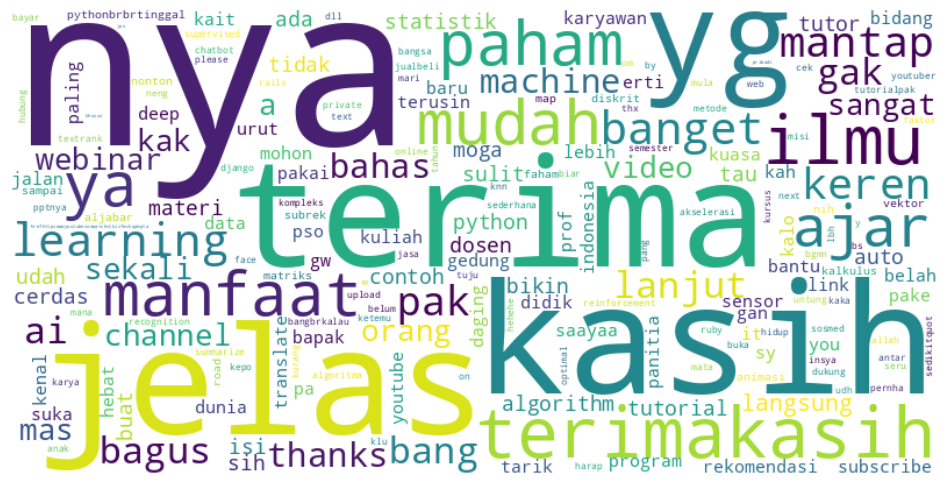

In [18]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua komentar yang sudah dipreprocessing menjadi satu string
all_words = " ".join(df["comment"])

# Hitung frekuensi kata
word_counts = Counter(all_words.split())

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)

# Tampilkan word cloud
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


<ipython-input-19-61caa08a51c7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freqs, y=words, palette='Blues_d')


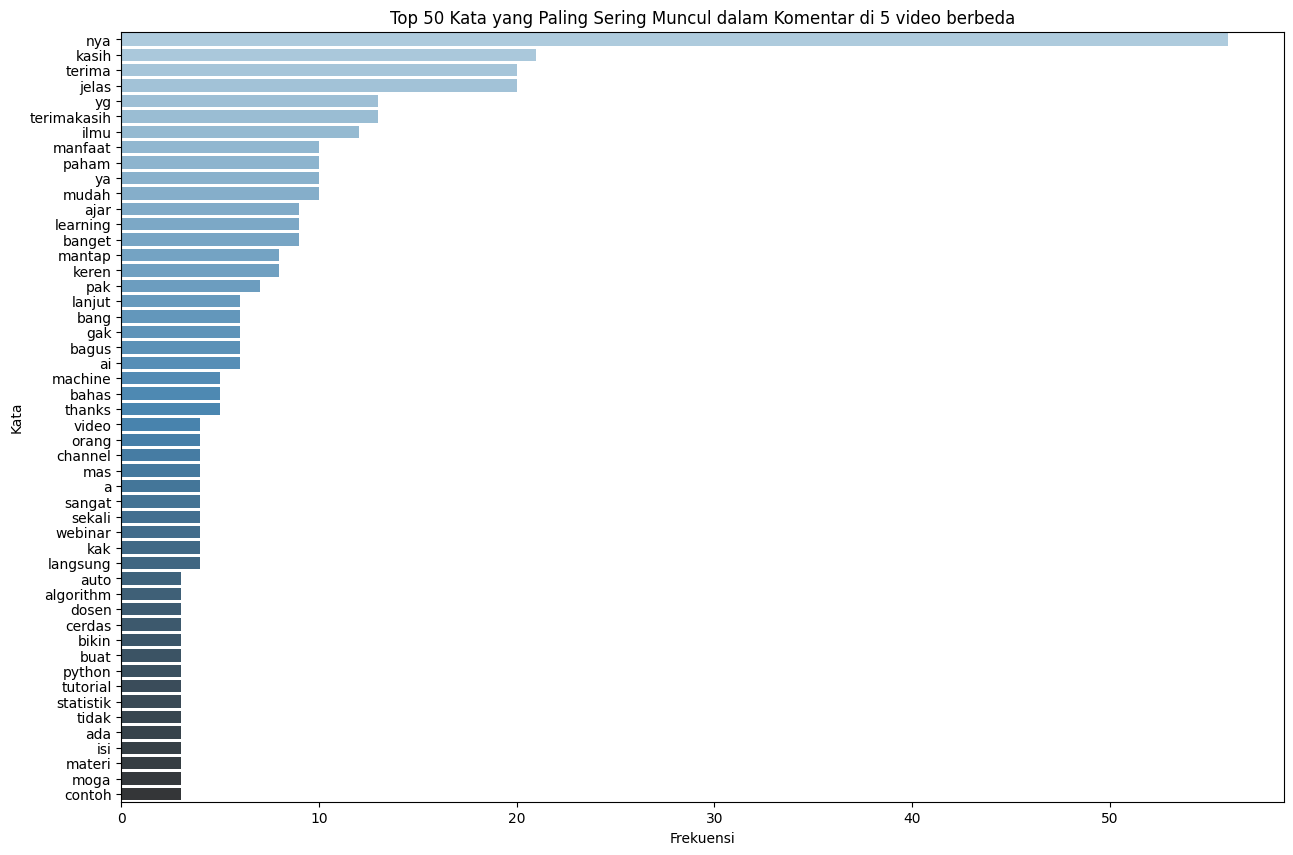

In [19]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

top_50_words = word_counts.most_common(50)

words, freqs = zip(*top_50_words)

plt.figure(figsize=(15, 10))
sns.barplot(x=freqs, y=words, palette='Blues_d')

plt.title('Top 50 Kata yang Paling Sering Muncul dalam Komentar di 5 video berbeda')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

plt.show()

Berdasarkan chart yang telah di diproses, kita mendapati bahwa "nya" menjadi kata yang paling sering muncul dalam text/comment, disusul oleh kasih dan terima

Meskipun video yang diproses berkaitan dengan machine learning, akan tetapi 'nya' yang muncul pertama, meskipun bukan kata dasar dan merupakan akhiran tapi bisa paling banyak muncul

Selain itu, dapat dilihat behavior masyarakat indonesia ketika berkomentar mengenai video edukasi yang mayoritas mengucapkan terima kasih. Hal ini kembali lagi, tergantung dari text yang diambil, jumlah text yang dapat diambil, dan karena video tentang edukasi, berbeda video menghasilkan comment yang berbeda juga

# D. Vectorization

##  CountVectorizer

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

#tokenizer dilakukan pada proses ini, sehingga inputnya adalah data setelah cleansing
#bigram

comment = df['comment']
vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(comment)
CVec=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out()) #or use get_feature_names()
CVec.head()


,ada gedungbrselain,ada jurus,ada webinar,ahli jarang,ai aplikasi,ai dunia,ai gimana,ai pingin,ai robot,ai udah,...,yg mantap,yg paling,yg sangat,yg simpul,yg spesifik,yg terima,youtube ada,youtube belah,youtuber dunia,yt moga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
vectorizer = CountVectorizer(ngram_range=(1, 1))
X = vectorizer.fit_transform(comment)
CVec=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
CVec.head()

,ada,ahli,ai,aja,ajar,akselerasi,akurat,algorithm,algoritma,aljabar,...,webinar,what,wkwkwk,ya,yabrtapi,yg,you,youtube,youtuber,yt
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
print(list(CVec.columns))

['ada', 'ahli', 'ai', 'aja', 'ajar', 'akselerasi', 'akurat', 'algorithm', 'algoritma', 'aljabar', 'allah', 'amerika', 'anak', 'animasi', 'antar', 'antusias', 'aplikasi', 'arry', 'artificial', 'assalamualaikum', 'atas', 'auto', 'baca', 'bagus', 'bagusbermnfaat', 'bahas', 'banding', 'bang', 'bangbrkalau', 'banget', 'bangsa', 'bantu', 'banyak', 'bapak', 'bapakini', 'baru', 'bayar', 'belah', 'belum', 'berkah', 'bermanfaatgbu', 'bermanfat', 'besar', 'bgmn', 'biar', 'bidang', 'bikin', 'bisa', 'bole', 'bosan', 'brdan', 'brsaya', 'brthankyouu', 'bs', 'bso', 'btw', 'buat', 'buka', 'butuh', 'by', 'caranyabrmisalnya', 'cek', 'cenderung', 'cerah', 'cerdas', 'chanel', 'channel', 'channellnya', 'chat', 'chatbot', 'ciamik', 'compares', 'contoh', 'daging', 'dalam', 'dalem', 'darimana', 'data', 'databasebrbrmohon', 'dati', 'deep', 'deteksi', 'didik', 'dinamis', 'diskrit', 'ditek', 'django', 'dll', 'donk', 'dosen', 'dukung', 'dunia', 'edit', 'edukasi', 'enak', 'erp', 'erti', 'explanation', 'face', 'face

In [23]:
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(comment)
CVec=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
CVec.head()

,ada,ada gedungbrselain,ada jurus,ada webinar,ahli,ahli jarang,ai,ai aplikasi,ai dunia,ai gimana,...,yg spesifik,yg terima,you,youtube,youtube ada,youtube belah,youtuber,youtuber dunia,yt,yt moga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Bag of Words (BoW) Vectorization
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(comment)

# Menampilkan bentuk matrix BoW
print("Bag of Words Matrix Shape:", bow_matrix.shape)

Bag of Words Matrix Shape: (109, 381)


## TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comment)
#vectorizer.get_feature_names_out()
TFIDF=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
TFIDF.head()

,ada,ahli,ai,aja,ajar,akselerasi,akurat,algorithm,algoritma,aljabar,...,webinar,what,wkwkwk,ya,yabrtapi,yg,you,youtube,youtuber,yt
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.139416,0.0,0.0,0.597818,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X

<109x381 sparse matrix of type '<class 'numpy.float64'>'
	with 726 stored elements in Compressed Sparse Row format>

In [27]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(comment)

# Menampilkan bentuk matrix TF-IDF
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (109, 381)


# E.
https://drive.google.com/drive/u/0/folders/1tG83LDXedOqkqBgje1p_usH0Rc3utq5P